# 데이터 준비

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
!cp /gdrive/MyDrive/tmp/glaucoma.zip ./

In [4]:
!unzip glaucoma.zip

Archive:  glaucoma.zip
   creating: test/
   creating: test/advanced/
  inflating: test/advanced/421.png   
  inflating: test/advanced/422.png   
  inflating: test/advanced/423.png   
  inflating: test/advanced/424.png   
  inflating: test/advanced/425.png   
  inflating: test/advanced/426.png   
  inflating: test/advanced/427.png   
  inflating: test/advanced/428.png   
  inflating: test/advanced/429.png   
  inflating: test/advanced/430.png   
  inflating: test/advanced/431.png   
  inflating: test/advanced/432.png   
  inflating: test/advanced/433.png   
  inflating: test/advanced/434.png   
  inflating: test/advanced/435.png   
  inflating: test/advanced/436.png   
  inflating: test/advanced/437.png   
  inflating: test/advanced/438.png   
  inflating: test/advanced/439.png   
  inflating: test/advanced/440.png   
  inflating: test/advanced/441.png   
  inflating: test/advanced/442.png   
  inflating: test/advanced/443.png   
  inflating: test/advanced/444.png   
  inflating: test/

In [5]:
!mkdir glaucoma
!mv train glaucoma/
!mv valid glaucoma/
!mv test glaucoma/

# 전이 학습 시도

31801344/31790344 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten (Flatten)           (None, 68992)             0         
                                                                 
 dense (Dense)               (None, 256)               17662208  
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 25,432,572
Trainable params: 17,663,491
Non

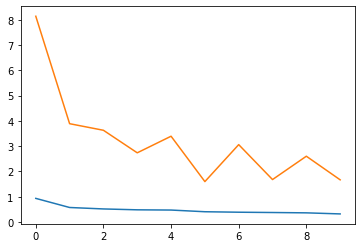

3/3 [==============================] - 1s 285ms/step - loss: 2.0642 - acc: 0.4870
loss= 2.0642495155334473
acc= 0.48701298236846924


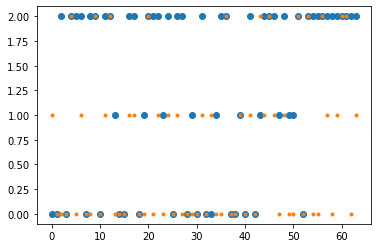

label category index = 0.0
predicted category index = 1
predicted category name = early


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = keras.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# 전이학습 인데 conv도 학습

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten_1 (Flatten)         (None, 68992)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               17662208  
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 25,432,572
Trainable params: 25,364,485
Non-trainable params: 68,087
_____________________________________

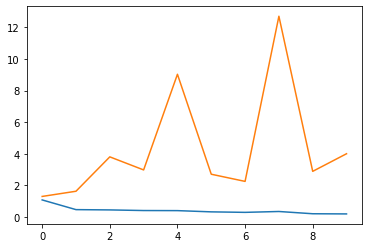

3/3 [==============================] - 1s 153ms/step - loss: 4.3178 - acc: 0.4026
loss= 4.317797660827637
acc= 0.4025973975658417


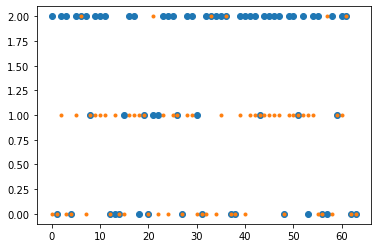

label category index = 2.0
predicted category index = 0
predicted category name = advanced


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = True   # <-----------------------

model = keras.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# vanila CNN으로

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

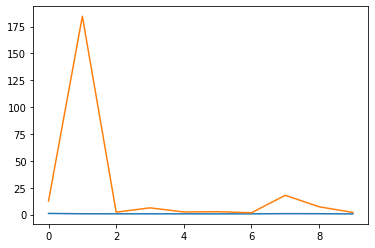

3/3 [==============================] - 1s 519ms/step - loss: 2.2864 - acc: 0.3182
loss= 2.2863669395446777
acc= 0.3181818127632141


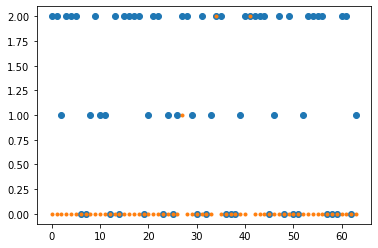

label category index = 2.0
predicted category index = 0
predicted category name = advanced


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))   # <-----------------------
# conv_layers.trainable = True   # <-----------------------

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))   # <-----------------------
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))   # <-----------------------
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# learning rate 작게

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

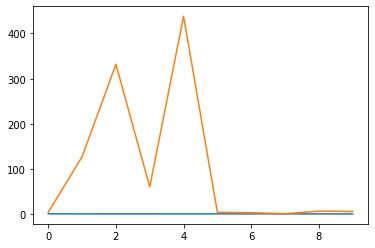

3/3 [==============================] - 1s 156ms/step - loss: 7.1291 - acc: 0.3052
loss= 7.129073619842529
acc= 0.30519479513168335


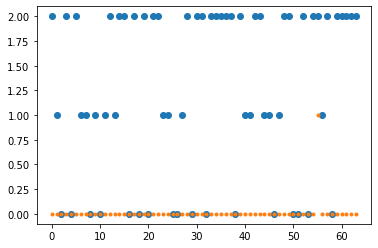

label category index = 2.0
predicted category index = 0
predicted category name = advanced


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.RMSprop(learning_rate=0.0001)   # <-----------------------
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])   # <-----------------------
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


In [ ]:
train_data_generator.batch_size=1000
batch_x, batch_y = train_data_generator.next()
print(batch_x.shape)
print(batch_y.shape)

(1000, 224, 224, 3)
(1000,)


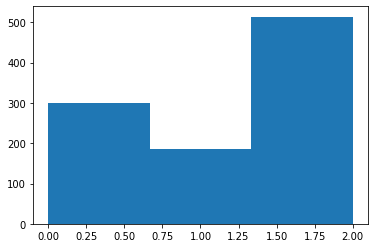

In [ ]:
plt.hist(batch_y, bins=3)
plt.show()

# optimizer를 Adam으로

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

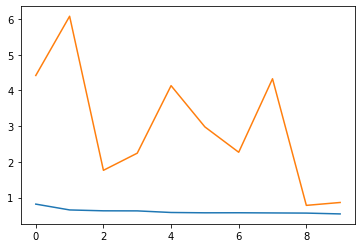

3/3 [==============================] - 1s 155ms/step - loss: 1.1083 - acc: 0.4545
loss= 1.1082583665847778
acc= 0.4545454680919647


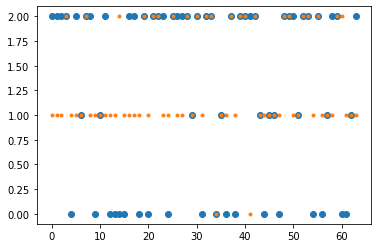

label category index = 2.0
predicted category index = 1
predicted category name = early


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)   # <-----------------------
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# epoch 더 많이 학습

Epoch 1/40
20/20 [==============================] - 18s 868ms/step - loss: 0.5333 - acc: 0.7789 - val_loss: 1.4529 - val_acc: 0.5188
Epoch 2/40
20/20 [==============================] - 17s 860ms/step - loss: 0.5269 - acc: 0.7748 - val_loss: 2.2313 - val_acc: 0.3938
Epoch 3/40
20/20 [==============================] - 17s 868ms/step - loss: 0.5053 - acc: 0.7951 - val_loss: 1.4714 - val_acc: 0.7188
Epoch 4/40
20/20 [==============================] - 18s 867ms/step - loss: 0.5292 - acc: 0.7813 - val_loss: 2.1754 - val_acc: 0.5688
Epoch 5/40
20/20 [==============================] - 17s 860ms/step - loss: 0.5164 - acc: 0.7821 - val_loss: 1.4373 - val_acc: 0.5750
Epoch 6/40
20/20 [==============================] - 18s 926ms/step - loss: 0.5042 - acc: 0.7854 - val_loss: 0.6855 - val_acc: 0.7125
Epoch 7/40
20/20 [==============================] - 17s 866ms/step - loss: 0.5054 - acc: 0.7894 - val_loss: 1.2552 - val_acc: 0.6000
Epoch 8/40
20/20 [==============================] - 17s 863ms/step - 

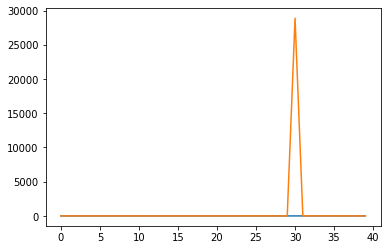

3/3 [==============================] - 1s 158ms/step - loss: 1.1822 - acc: 0.4221
loss= 1.1821633577346802
acc= 0.4220779240131378


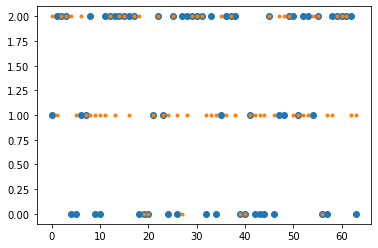

label category index = 1.0
predicted category index = 2
predicted category name = normal


In [ ]:
history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=40   # <-----------------------
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])

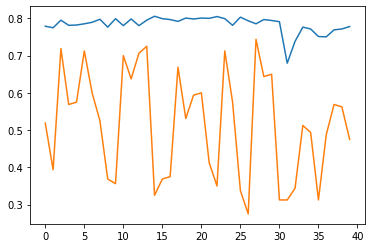

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

# Conv 레이어들 작게 조정

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_69 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_70 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 conv2d_71 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 conv2d_73 (Conv2D)          (None, 112, 112, 32)      9248      
                                                      

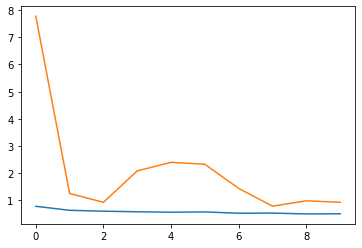

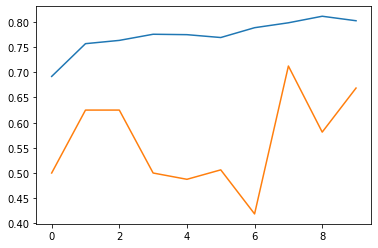

3/3 [==============================] - 1s 441ms/step - loss: 1.1576 - acc: 0.5649
loss= 1.157572627067566
acc= 0.5649350881576538


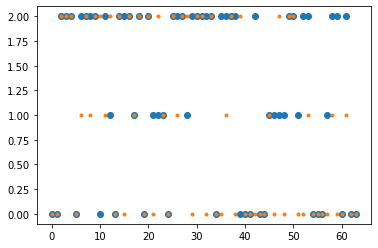

label category index = 0.0
predicted category index = 0
predicted category name = advanced


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(32, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(32, (3,3), padding='same'))   # <-----------------------
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(32, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(32, (3,3), padding='same'))   # <-----------------------
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(128, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(128, (3,3), padding='same'))   # <-----------------------
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(128, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(128, (3,3), padding='same'))   # <-----------------------
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# Conv 더 작게

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_85 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 conv2d_86 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_87 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 conv2d_88 (Conv2D)          (None, 112, 112, 32)      9248      
                                                      

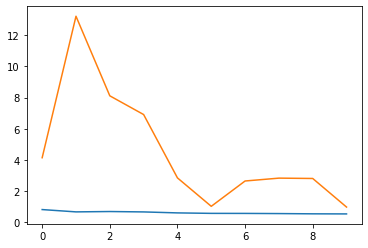

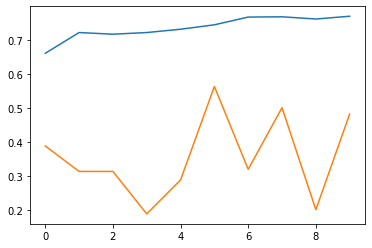

3/3 [==============================] - 1s 160ms/step - loss: 1.1353 - acc: 0.4221
loss= 1.1353431940078735
acc= 0.4220779240131378


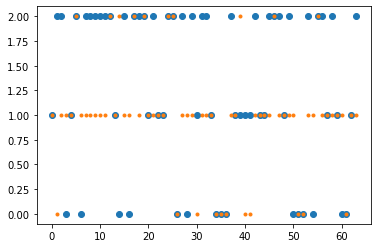

label category index = 1.0
predicted category index = 1
predicted category name = early


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(32, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(32, (3,3), padding='same'))   # <-----------------------
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(Conv2D(64, (3,3), padding='same'))   # <-----------------------
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# 사용하면 안될 preprocess를 제거하고 scaling

(32, 224, 224, 3)
(32,)


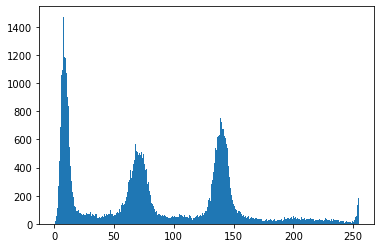

In [ ]:
train_data_generator.batch_size=32
batch_x, batch_y = train_data_generator.next()
print(batch_x.shape)
print(batch_y.shape)

plt.hist(batch_x[0].flatten(), bins=1000)
plt.show()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_99 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_100 (Conv2D)         (None, 224, 224, 32)      9248      
                                                                 
 conv2d_101 (Conv2D)         (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_102 (Conv2D)         (None, 112, 112, 32)      9248      
                                                                 
 conv2d_103 (Conv2D)         (None, 112, 112, 32)      9248      
                                                      

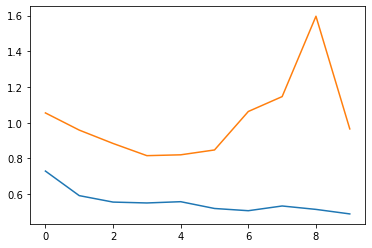

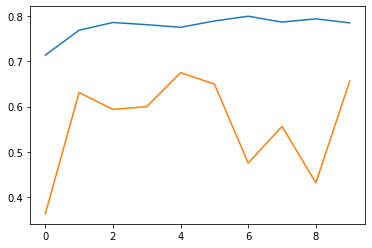

3/3 [==============================] - 1s 154ms/step - loss: 1.1733 - acc: 0.5519
loss= 1.1733235120773315
acc= 0.551948070526123


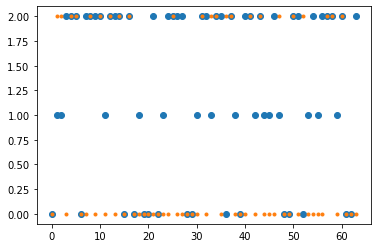

label category index = 0.0
predicted category index = 0
predicted category name = advanced


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      rescale=1/255.,   # <-----------------------
      # preprocessing_function=preprocessor   # <-----------------------
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      rescale=1/255.,   # <-----------------------
      # preprocessing_function=preprocessor   # <-----------------------
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      rescale=1/255.,   # <-----------------------
      # preprocessing_function=preprocessor   # <-----------------------
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


(32, 224, 224, 3)
(32,)


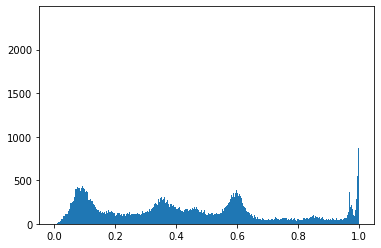

In [ ]:
train_data_generator.batch_size=32
batch_x, batch_y = train_data_generator.next()
print(batch_x.shape)
print(batch_y.shape)

plt.hist(batch_x[0].flatten(), bins=1000)
plt.show()

# Learning Rate 더 줄이고, epoch 수 많이

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_114 (Conv2D)         (None, 224, 224, 32)      896       
                                                                 
 conv2d_115 (Conv2D)         (None, 224, 224, 32)      9248      
                                                                 
 conv2d_116 (Conv2D)         (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_117 (Conv2D)         (None, 112, 112, 32)      9248      
                                                                 
 conv2d_118 (Conv2D)         (None, 112, 112, 32)      9248      
                                                     

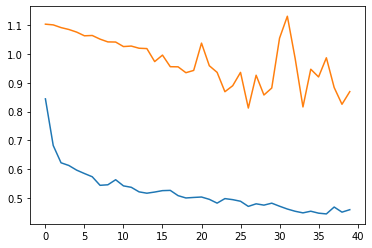

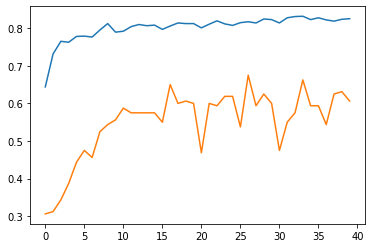

3/3 [==============================] - 1s 149ms/step - loss: 1.0334 - acc: 0.5649
loss= 1.0333715677261353
acc= 0.5649350881576538


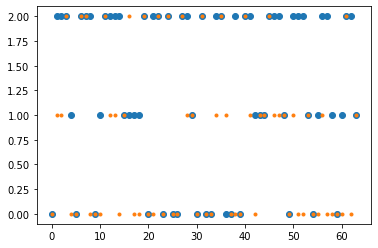

label category index = 0.0
predicted category index = 0
predicted category name = advanced


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001*0.1)  # <-----------------------
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      rescale=1/255.,
      # preprocessing_function=preprocessor 
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      rescale=1/255.
      # preprocessing_function=preprocessor 
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      rescale=1/255., 
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=40  # <-----------------------
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# 데이터 증강 제거

GPU를 거의 사용하지 못한다

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_129 (Conv2D)         (None, 224, 224, 32)      896       
                                                                 
 conv2d_130 (Conv2D)         (None, 224, 224, 32)      9248      
                                                                 
 conv2d_131 (Conv2D)         (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_132 (Conv2D)         (None, 112, 112, 32)      9248      
                                                                 
 conv2d_133 (Conv2D)         (None, 112, 112, 32)      9248      
                                                     

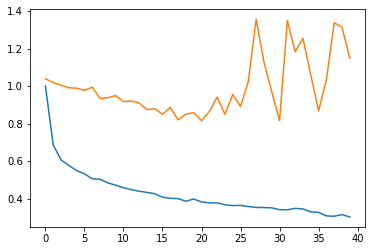

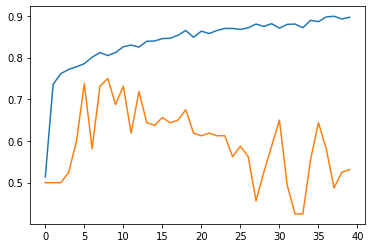

3/3 [==============================] - 1s 153ms/step - loss: 1.4470 - acc: 0.4610
loss= 1.4469951391220093
acc= 0.4610389471054077


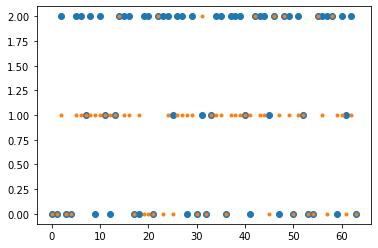

label category index = 0.0
predicted category index = 0
predicted category name = advanced


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001*0.1)  # <-----------------------
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      # rotation_range=10,  # <-----------------------
      # width_shift_range=0.1,  # <-----------------------
      # height_shift_range=0.1,  # <-----------------------
      # horizontal_flip=True,  # <-----------------------
      # vertical_flip=False,  # <-----------------------
      rescale=1/255.,
      # preprocessing_function=preprocessor 
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      rescale=1/255.
      # preprocessing_function=preprocessor 
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      rescale=1/255., 
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=40
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# 1000 에폭, 다시 데이터 증강하고

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_144 (Conv2D)         (None, 224, 224, 32)      896       
                                                                 
 conv2d_145 (Conv2D)         (None, 224, 224, 32)      9248      
                                                                 
 conv2d_146 (Conv2D)         (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_147 (Conv2D)         (None, 112, 112, 32)      9248      
                                                                 
 conv2d_148 (Conv2D)         (None, 112, 112, 32)      9248      
                                                     

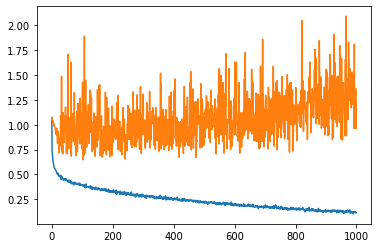

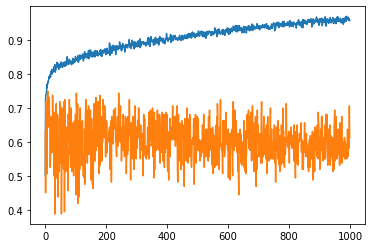

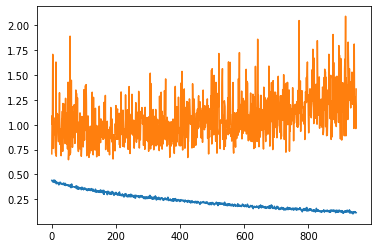

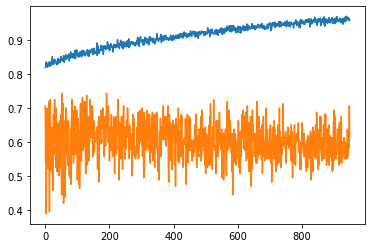

3/3 [==============================] - 1s 152ms/step - loss: 1.6429 - acc: 0.5519
loss= 1.6429442167282104
acc= 0.551948070526123


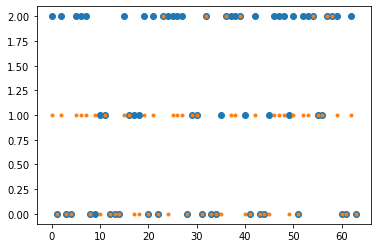

label category index = 2.0
predicted category index = 1
predicted category name = early


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001*0.1)  # <-----------------------
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,  # <-----------------------
      width_shift_range=0.1,  # <-----------------------
      height_shift_range=0.1,  # <-----------------------
      horizontal_flip=True,  # <-----------------------
      vertical_flip=False,  # <-----------------------
      rescale=1/255.,
      # preprocessing_function=preprocessor 
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      rescale=1/255.
      # preprocessing_function=preprocessor 
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      rescale=1/255., 
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=1000
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

plt.plot(history.history['loss'][50:])
plt.plot(history.history['val_loss'][50:])
plt.show()

plt.plot(history.history['acc'][50:])
plt.plot(history.history['val_acc'][50:])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# 오버피팅 방지 적용

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_16 (Bat  (None, 224, 224, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_17 (Bat  (None, 224, 224, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_18 (Bat  (None, 224, 224, 32)    

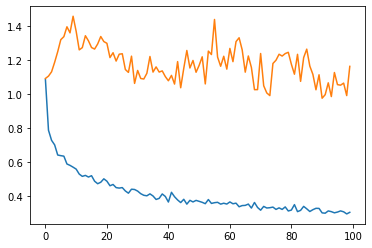

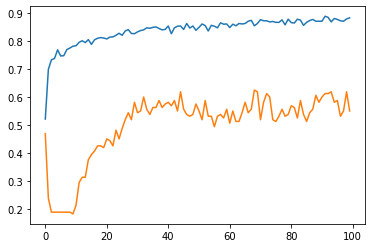

3/3 [==============================] - 1s 231ms/step - loss: 1.5554 - acc: 0.5130
loss= 1.5553568601608276
acc= 0.5129870176315308


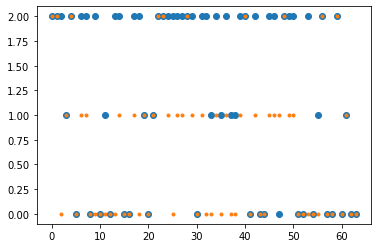

label category index = 2.0
predicted category index = 2
predicted category name = normal


In [7]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(BatchNormalization())  # <---------------------
model.add(Conv2D(32, (3,3), padding='same'))
model.add(BatchNormalization())  # <---------------------
model.add(Conv2D(32, (3,3), padding='same'))
model.add(BatchNormalization())  # <---------------------
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), padding='same'))
model.add(BatchNormalization())  # <---------------------
model.add(Conv2D(32, (3,3), padding='same'))
model.add(BatchNormalization())  # <---------------------
model.add(Conv2D(32, (3,3), padding='same'))
model.add(BatchNormalization())  # <---------------------
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())  # <---------------------
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())  # <---------------------
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())  # <---------------------
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())  # <---------------------
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())  # <---------------------
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())  # <---------------------
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())  # <---------------------
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())  # <---------------------
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())  # <---------------------
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001*0.1)
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      rescale=1/255.,
      # preprocessing_function=preprocessor 
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      rescale=1/255.
      # preprocessing_function=preprocessor 
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      rescale=1/255., 
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=100
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()



loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# Dropout 적용

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_64 (Bat  (None, 224, 224, 32)     128       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 224, 224, 32)      0         
                                                                 
 conv2d_61 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_65 (Bat  (None, 224, 224, 32)     128       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 224, 224, 32)     

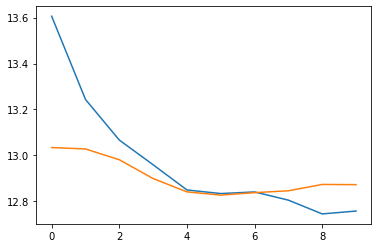

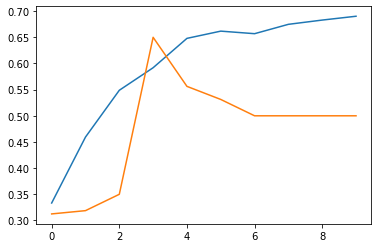

3/3 [==============================] - 1s 409ms/step - loss: 12.8970 - acc: 0.5065
loss= 12.896977424621582
acc= 0.5064935088157654


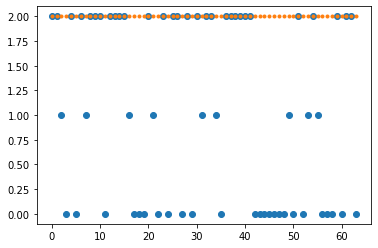

label category index = 2.0
predicted category index = 2
predicted category name = normal


In [10]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.regularizers import l1, l2, L1L2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001*0.1)
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      rescale=1/255.,
      # preprocessing_function=preprocessor 
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      rescale=1/255.
      # preprocessing_function=preprocessor 
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      rescale=1/255., 
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()



loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# 학습율 크게

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_150 (Conv2D)         (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_160 (Ba  (None, 224, 224, 32)     128       
 tchNormalization)                                               
                                                                 
 dropout_96 (Dropout)        (None, 224, 224, 32)      0         
                                                                 
 conv2d_151 (Conv2D)         (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_161 (Ba  (None, 224, 224, 32)     128       
 tchNormalization)                                               
                                                                 
 dropout_97 (Dropout)        (None, 224, 224, 32)    

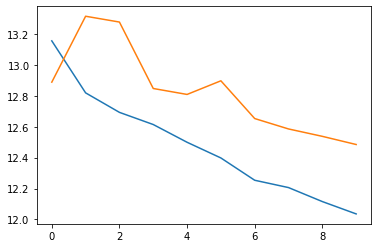

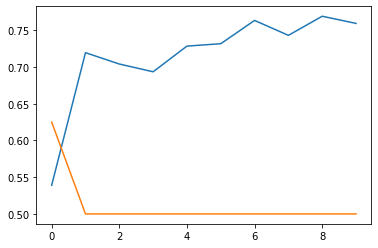

2/2 [==============================] - 1s 63ms/step - loss: 12.4520 - acc: 0.5065
loss= 12.451967239379883
acc= 0.5064935088157654


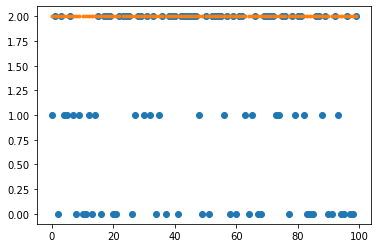

label category index = 1.0
predicted category index = 2
predicted category name = normal


In [16]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.regularizers import l1, l2, L1L2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)  # <-----------------------
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 128

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      rescale=1/255.,
      # preprocessing_function=preprocessor 
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      rescale=1/255.
      # preprocessing_function=preprocessor 
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      rescale=1/255., 
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10,
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()



loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# nomalization의 것 가져와서 Conv 5x5로

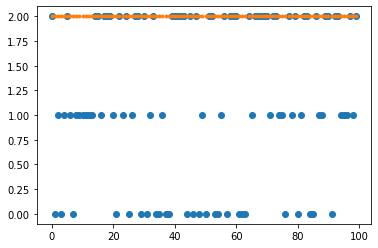

10/10 [==============================] - 15s 1s/step - loss: 12.4328 - acc: 0.5122
loss= 12.432754516601562
acc= 0.5121951103210449


In [18]:

batch_x, batch_y = train_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()

loss, acc = model.evaluate(train_data_generator)
print("loss=", loss)
print("acc=", acc)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_192 (Conv2D)         (None, 224, 224, 32)      2432      
                                                                 
 conv2d_193 (Conv2D)         (None, 224, 224, 32)      25632     
                                                                 
 conv2d_194 (Conv2D)         (None, 224, 224, 32)      25632     
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_195 (Conv2D)         (None, 112, 112, 32)      25632     
                                                                 
 conv2d_196 (Conv2D)         (None, 112, 112, 32)      25632     
                                                     

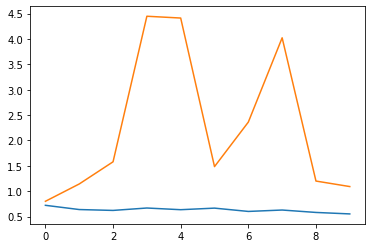

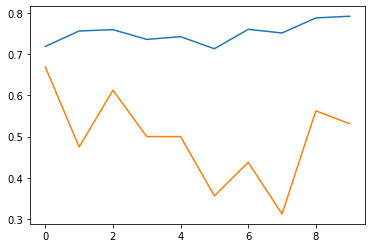

3/3 [==============================] - 1s 257ms/step - loss: 1.2339 - acc: 0.4870
loss= 1.2338895797729492
acc= 0.48701298236846924


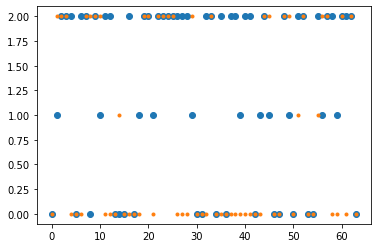

label category index = 0.0
predicted category index = 0
predicted category name = advanced


In [24]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (5,5), padding='same'))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (5,5), padding='same'))
model.add(Conv2D(64, (5,5), padding='same'))
model.add(Conv2D(64, (5,5), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (5,5), padding='same'))
model.add(Conv2D(64, (5,5), padding='same'))
model.add(Conv2D(64, (5,5), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      rescale=1/255.,
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      rescale=1/255.,
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      rescale=1/255.,
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


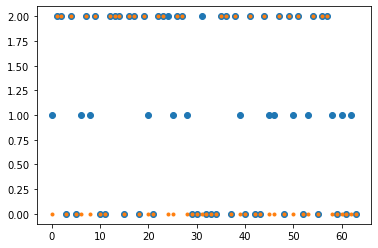

20/20 [==============================] - 34s 2s/step - loss: 0.7882 - acc: 0.7211
loss= 0.7882108092308044
acc= 0.7211382389068604


In [22]:

batch_x, batch_y = train_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()

loss, acc = model.evaluate(train_data_generator)
print("loss=", loss)
print("acc=", acc)

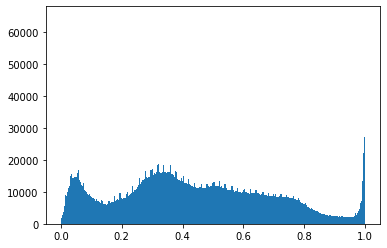

In [23]:
plt.hist(batch_x.flatten(), bins=1000)
plt.show()

# train data 일부를 validation data로

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_216 (Conv2D)         (None, 224, 224, 32)      2432      
                                                                 
 conv2d_217 (Conv2D)         (None, 224, 224, 32)      25632     
                                                                 
 conv2d_218 (Conv2D)         (None, 224, 224, 32)      25632     
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_219 (Conv2D)         (None, 112, 112, 32)      25632     
                                                                 
 conv2d_220 (Conv2D)         (None, 112, 112, 32)      25632     
                                                     

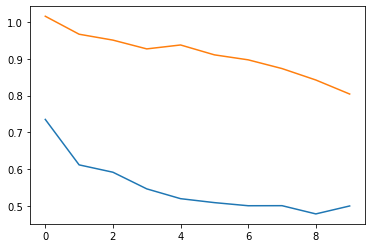

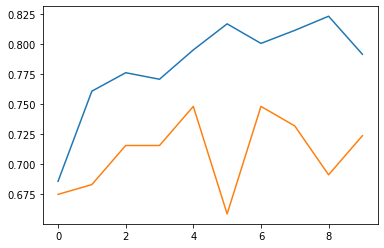

3/3 [==============================] - 1s 161ms/step - loss: 1.0537 - acc: 0.4805
loss= 1.0536911487579346
acc= 0.48051947355270386


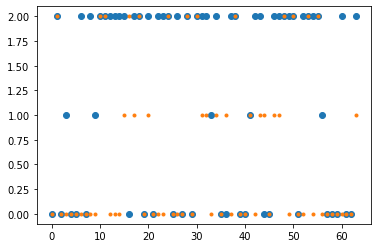

label category index = 0.0
predicted category index = 0
predicted category name = advanced


In [30]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (5,5), padding='same'))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (5,5), padding='same'))
model.add(Conv2D(64, (5,5), padding='same'))
model.add(Conv2D(64, (5,5), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (5,5), padding='same'))
model.add(Conv2D(64, (5,5), padding='same'))
model.add(Conv2D(64, (5,5), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001*0.1)
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      rescale=1/255.,
      validation_split=0.1
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse',
      subset="training"
)


valid_data_generator = ImageDataGenerator(
      rescale=1/255.,
      validation_split=0.1      
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse',
      subset="validation"
)

test_data_generator = ImageDataGenerator(
      rescale=1/255.,
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


In [34]:
loss, acc = model.evaluate(train_data_generator)
print("loss=", loss)
print("acc=", acc)

loss, acc = model.evaluate(valid_data_generator)
print("loss=", loss)
print("acc=", acc)

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)

18/18 [==============================] - 16s 876ms/step - loss: 0.7589 - acc: 0.8085
loss= 0.7588884830474854
acc= 0.8084914088249207
2/2 [==============================] - 0s 205ms/step - loss: 0.8040 - acc: 0.7236
loss= 0.8040048480033875
acc= 0.7235772609710693
3/3 [==============================] - 1s 151ms/step - loss: 1.0537 - acc: 0.4805
loss= 1.053691029548645
acc= 0.48051947355270386


# 데이터 섞자

In [77]:
!rm -rf glaucoma
!rm -rf glaucoma.old
!rm -rf g

In [78]:
!unzip -q glaucoma.zip
!mkdir glaucoma
!mv train glaucoma/
!mv valid glaucoma/
!mv test glaucoma/

In [79]:
!mv glaucoma glaucoma.old

!mkdir -p g/normal
!mkdir -p g/early
!mkdir -p g/advanced

!cp glaucoma.old/train/normal/* g/normal/
!cp glaucoma.old/valid/normal/* g/normal/
!cp glaucoma.old/test/normal/* g/normal/
!cp glaucoma.old/train/early/* g/early/
!cp glaucoma.old/valid/early/* g/early/
!cp glaucoma.old/test/early/* g/early/
!cp glaucoma.old/train/advanced/* g/advanced/
!cp glaucoma.old/valid/advanced/* g/advanced/
!cp glaucoma.old/test/advanced/* g/advanced/

!mkdir -p glaucoma/train/normal
!mkdir -p glaucoma/train/early
!mkdir -p glaucoma/train/advanced
!mkdir -p glaucoma/test/normal
!mkdir -p glaucoma/test/early
!mkdir -p glaucoma/test/advanced
!mkdir -p glaucoma/valid/normal
!mkdir -p glaucoma/valid/early
!mkdir -p glaucoma/valid/advanced


In [83]:
import glob
import random
from shutil import copyfile, move

for category in ["normal", "early", "advanced"]:

  file_list = {}
  file_list = glob.glob("g/{}/*.png".format(category))
  random.shuffle(file_list)


  i1 = int(len(file_list)*0.8)
  i2 = int(len(file_list)*0.9)
  files = {
      'train':file_list[:i1],
      'valid':file_list[i1:i2],
      'test':file_list[i2:]
  }

  for data_type in ['train', 'valid', 'test']:
    target_dir = 'glaucoma/{}/{}/'.format(data_type, category)
    print("copy {} files to {}".format(len(files[data_type]), target_dir))
    for file_name in files[data_type]:
      move(file_name, target_dir)

copy 630 files to glaucoma/train/normal/
copy 79 files to glaucoma/valid/normal/
copy 79 files to glaucoma/test/normal/
copy 231 files to glaucoma/train/early/
copy 29 files to glaucoma/valid/early/
copy 29 files to glaucoma/test/early/
copy 373 files to glaucoma/train/advanced/
copy 47 files to glaucoma/valid/advanced/
copy 47 files to glaucoma/test/advanced/


In [74]:
!apt-get update
!apt install tree

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:13 https://developer.

In [75]:
!tree -d glaucoma

glaucoma
├── test
│   ├── advanced
│   ├── early
│   └── normal
├── train
│   ├── advanced
│   ├── early
│   └── normal
└── valid
    ├── advanced
    ├── early
    └── normal

12 directories


# 데이터 섞고 다시 시도

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_240 (Conv2D)         (None, 224, 224, 32)      2432      
                                                                 
 conv2d_241 (Conv2D)         (None, 224, 224, 32)      25632     
                                                                 
 conv2d_242 (Conv2D)         (None, 224, 224, 32)      25632     
                                                                 
 max_pooling2d_80 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_243 (Conv2D)         (None, 112, 112, 32)      25632     
                                                                 
 conv2d_244 (Conv2D)         (None, 112, 112, 32)      25632     
                                                     

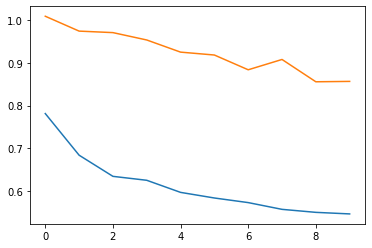

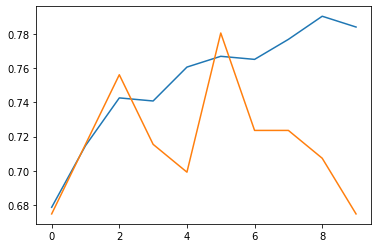

3/3 [==============================] - 1s 250ms/step - loss: 0.8695 - acc: 0.6774
loss= 0.8694891929626465
acc= 0.6774193644523621


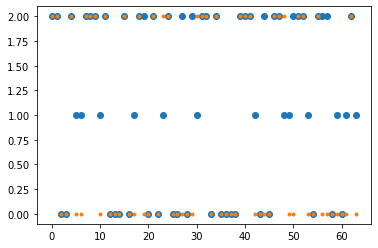

label category index = 2.0
predicted category index = 2
predicted category name = normal


In [84]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (5,5), padding='same'))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (5,5), padding='same'))
model.add(Conv2D(64, (5,5), padding='same'))
model.add(Conv2D(64, (5,5), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (5,5), padding='same'))
model.add(Conv2D(64, (5,5), padding='same'))
model.add(Conv2D(64, (5,5), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001*0.1)
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      rescale=1/255.,
      validation_split=0.1
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse',
      subset="training"
)


valid_data_generator = ImageDataGenerator(
      rescale=1/255.,
      validation_split=0.1      
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse',
      subset="validation"
)

test_data_generator = ImageDataGenerator(
      rescale=1/255.,
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


In [85]:
loss, acc = model.evaluate(train_data_generator)
print("loss=", loss)
print("acc=", acc)

loss, acc = model.evaluate(valid_data_generator)
print("loss=", loss)
print("acc=", acc)

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)

18/18 [==============================] - 14s 767ms/step - loss: 0.8416 - acc: 0.6994
loss= 0.8416097164154053
acc= 0.6993699073791504
2/2 [==============================] - 0s 210ms/step - loss: 0.8564 - acc: 0.6748
loss= 0.8564379811286926
acc= 0.6747967600822449
3/3 [==============================] - 1s 164ms/step - loss: 0.8695 - acc: 0.6774
loss= 0.8694891929626465
acc= 0.6774193644523621


# 에폭 100으로, model save callback 적용

In [90]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.acces = []
    self.val_acces = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.acces.append(logs.get('acc'))
    self.val_acces.append(logs.get('val_acc'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();

    plt.plot(self.epochs, self.acces, label="acc")
    plt.plot(self.epochs, self.val_acces, label="val_acc")
    plt.legend()
    plt.show();

    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

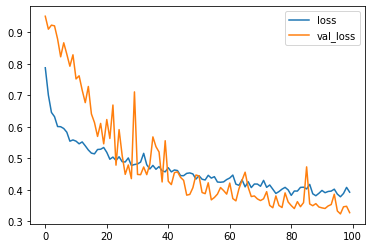

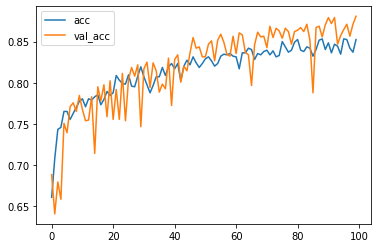

loss =  0.39295637607574463 , val_loss =  0.32801273465156555
20/20 [==============================] - 20s 1s/step - loss: 0.3930 - acc: 0.8525 - val_loss: 0.3280 - val_acc: 0.8809


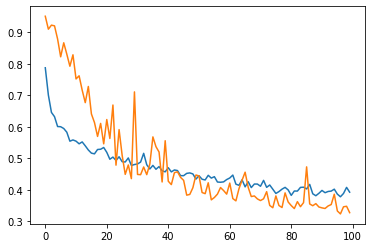

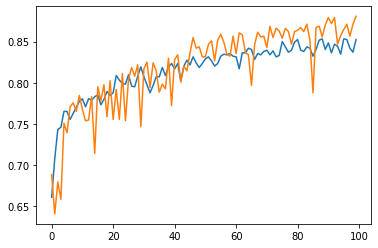

3/3 [==============================] - 1s 167ms/step - loss: 0.4851 - acc: 0.7935
loss= 0.4850771427154541
acc= 0.7935484051704407


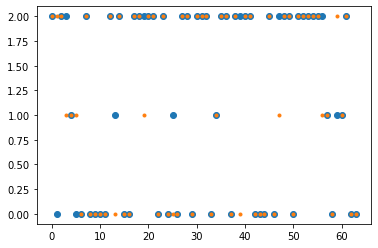

label category index = 2.0
predicted category index = 2
predicted category name = normal


In [92]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (5,5), padding='same'))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (5,5), padding='same'))
model.add(Conv2D(64, (5,5), padding='same'))
model.add(Conv2D(64, (5,5), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (5,5), padding='same'))
model.add(Conv2D(64, (5,5), padding='same'))
model.add(Conv2D(64, (5,5), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001*0.1)
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
# model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      rescale=1/255.,
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse',
)


valid_data_generator = ImageDataGenerator(
      rescale=1/255.,
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse',
)

test_data_generator = ImageDataGenerator(
      rescale=1/255.,
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


from tensorflow.keras.callbacks import ModelCheckpoint
model_check_point = ModelCheckpoint(
    'best_model.h5', 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True)
plot_losses = PlotLosses()

history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=100,
      callbacks=[model_check_point, plot_losses]
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


In [93]:
model = keras.models.load_model('best_model.h5')
loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)

3/3 [==============================] - 1s 165ms/step - loss: 0.4896 - acc: 0.7742
loss= 0.4896078407764435
acc= 0.774193525314331


# Template 코드로 epoch 100번

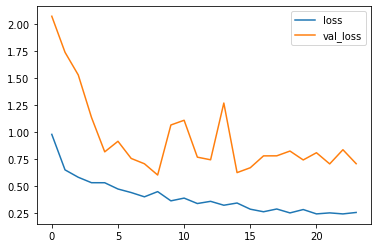

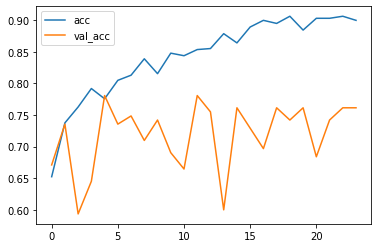

loss =  0.25910478830337524 , val_loss =  0.7099834084510803
20/20 [==============================] - 16s 815ms/step - loss: 0.2591 - acc: 0.8995 - val_loss: 0.7100 - val_acc: 0.7613
Epoch 25/100
 8/20 [===========>..................] - ETA: 9s - loss: 0.2252 - acc: 0.9062 

KeyboardInterrupt: ignored

In [96]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = keras.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


from tensorflow.keras.callbacks import ModelCheckpoint
model_check_point = ModelCheckpoint(
    'best_model.h5', 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True)
plot_losses = PlotLosses()

history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=100,
      callbacks=[model_check_point, plot_losses]
)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()





model = keras.models.load_model('best_model.h5')

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# 템플릿 코드에 trainable을 True로

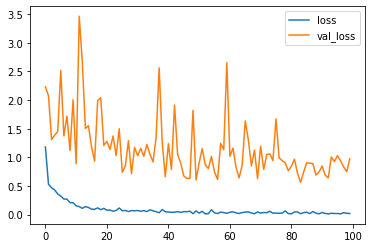

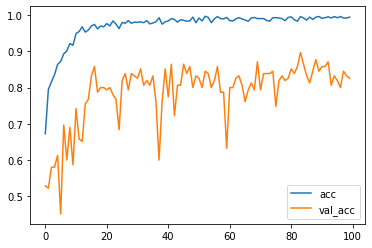

loss =  0.017737247049808502 , val_loss =  0.9721117615699768
20/20 [==============================] - 19s 960ms/step - loss: 0.0177 - acc: 0.9943 - val_loss: 0.9721 - val_acc: 0.8258


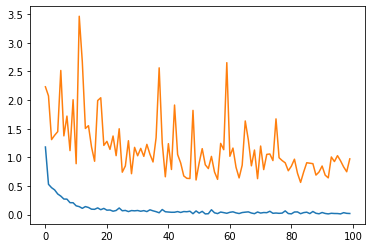

3/3 [==============================] - 2s 161ms/step - loss: 3.6016 - acc: 0.5226
loss= 3.601550340652466
acc= 0.522580623626709


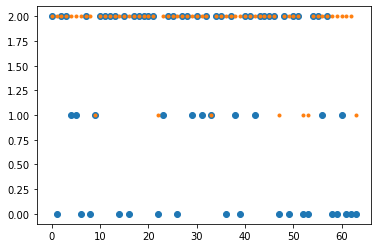

label category index = 2.0
predicted category index = 2
predicted category name = normal


In [97]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = True

model = keras.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


from tensorflow.keras.callbacks import ModelCheckpoint
model_check_point = ModelCheckpoint(
    'best_model.h5', 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True)
plot_losses = PlotLosses()

history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=100,
      callbacks=[model_check_point, plot_losses]
)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()





model = keras.models.load_model('best_model.h5')

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])

# 학습율 줄이고 500 에폭

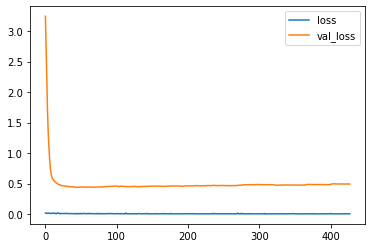

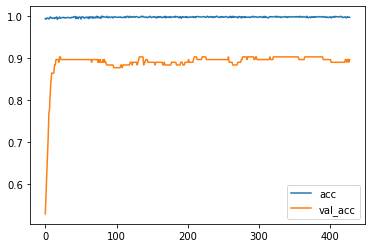

loss =  0.0039028089959174395 , val_loss =  0.49125558137893677
20/20 [==============================] - 20s 987ms/step - loss: 0.0039 - acc: 0.9976 - val_loss: 0.4913 - val_acc: 0.8968
Epoch 429/500
 4/20 [=====>........................] - ETA: 16s - loss: 2.3195e-04 - acc: 1.0000

KeyboardInterrupt: ignored

In [98]:
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001*0.1)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=500,
      callbacks=[model_check_point, plot_losses]
)



# 템플릿은 0.9가 한계, 에폭100에 model save callback적용을 에폭 500으로

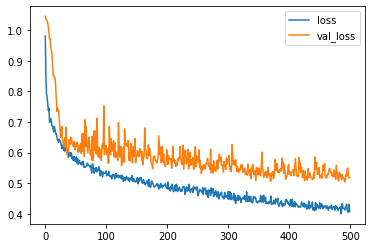

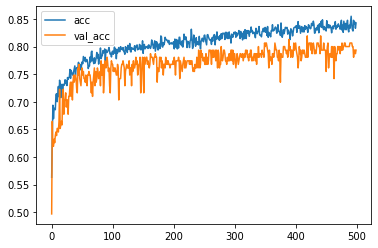

loss =  0.4073435664176941 , val_loss =  0.5169141888618469
20/20 [==============================] - 17s 823ms/step - loss: 0.4073 - acc: 0.8428 - val_loss: 0.5169 - val_acc: 0.7935


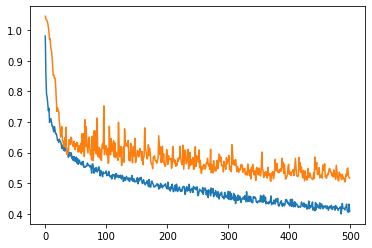

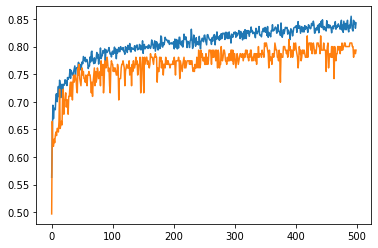

3/3 [==============================] - 1s 158ms/step - loss: 0.4558 - acc: 0.7871
loss= 0.4557826817035675
acc= 0.7870967984199524


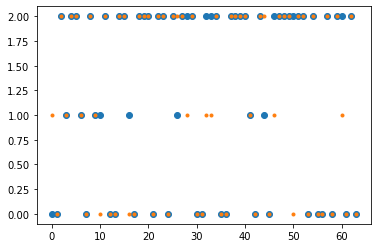

label category index = 0.0
predicted category index = 1
predicted category name = early


In [100]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = True

model = keras.Sequential()

# model.add(conv_layers)
model.add(Input((224,224,3)))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (5,5), padding='same'))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(Conv2D(32, (5,5), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (5,5), padding='same'))
model.add(Conv2D(64, (5,5), padding='same'))
model.add(Conv2D(64, (5,5), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (5,5), padding='same'))
model.add(Conv2D(64, (5,5), padding='same'))
model.add(Conv2D(64, (5,5), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001*0.01)
# model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
# model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      rescale=1/255.,
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse',
)


valid_data_generator = ImageDataGenerator(
      rescale=1/255.,
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/valid",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse',
)

test_data_generator = ImageDataGenerator(
      rescale=1/255.,
      # preprocessing_function=preprocessor
).flow_from_directory(
      "glaucoma/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


from tensorflow.keras.callbacks import ModelCheckpoint
model_check_point = ModelCheckpoint(
    'best_model.h5', 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True)
plot_losses = PlotLosses()

history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=500,
      callbacks=[model_check_point, plot_losses]
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()





model = keras.models.load_model('best_model.h5')

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(batch_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


# 500 에폭 더

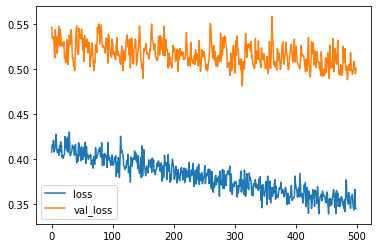

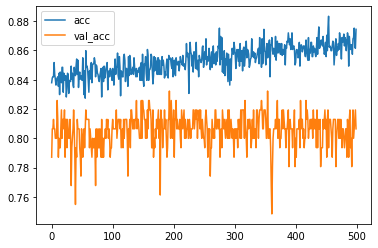

loss =  0.34530168771743774 , val_loss =  0.5005150437355042
3/3 [==============================] - 1s 158ms/step - loss: 0.4587 - acc: 0.8129
loss= 0.45869338512420654
acc= 0.8129032254219055


In [101]:

history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=500,
      callbacks=[model_check_point, plot_losses]
)


model = keras.models.load_model('best_model.h5')

loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)
